In [1]:
import pandas as pd


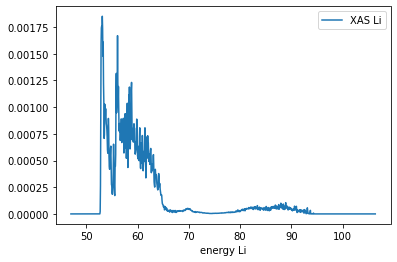

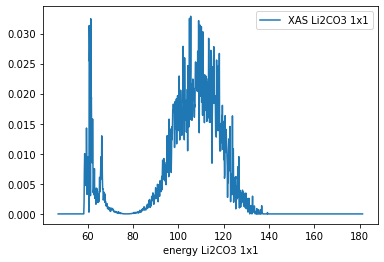

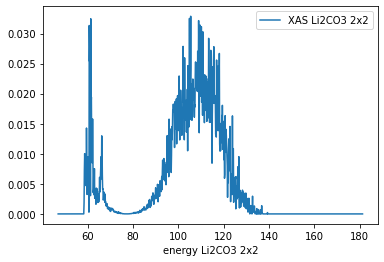

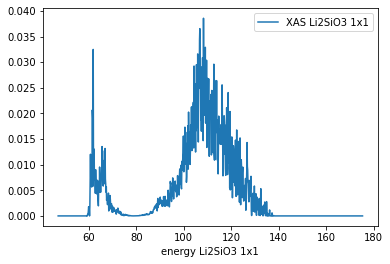

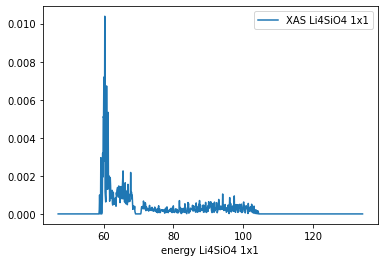

In [116]:
compounds=['Li', 'Li2CO3 1x1', 'Li2CO3 2x2', 'Li2SiO3 1x1', 'Li4SiO4 1x1' ]
files=['/home/broqvist/RUN/XAS/Li/XAS/CORE_DIELECTRIC_IMAG.dat', '/home/broqvist/RUN/XAS/Li2CO3/1x1/CORE_DIELECTRIC_IMAG.dat','/home/broqvist/RUN/XAS/Li2CO3/1x1/CORE_DIELECTRIC_IMAG.dat', '/home/broqvist/RUN/XAS/Li2SiO3/1x1/CORE_DIELECTRIC_IMAG.dat', '/home/broqvist/RUN/XAS/Li4SiO4/1x1//CORE_DIELECTRIC_IMAG.dat']

df=pd.DataFrame({})
for file,compound in zip(files,compounds):
    temp=pd.read_csv(file, sep='\s+', header=None, names=['energy '+compound,'XAS '+compound])
    df=pd.concat([df, temp], axis=1)
    df.plot(x='energy '+compound,y='XAS '+compound)

In [115]:
df

,energy Li,XAS Li,energy Li2CO3 1x1,XAS Li2CO3 1x1,energy Li2CO3 2x2,XAS Li2CO3 2x2,energy Li2SiO3 1x1,XAS Li2SiO3 1x1,energy Li4SiO4 1x1,XAS Li4SiO4 1x1
0,46.991812,0.0,46.991812,0.0,46.991812,0.0,46.991812,0.0,46.991812,0.0
1,47.051237,0.0,47.126196,0.0,47.126196,0.0,47.120254,0.0,47.036761,0.0
2,47.110661,0.0,47.260579,0.0,47.260579,0.0,47.248695,0.0,47.081709,0.0
3,47.170085,0.0,47.394963,0.0,47.394963,0.0,47.377136,0.0,47.126657,0.0
4,47.229510,0.0,47.529346,0.0,47.529346,0.0,47.505578,0.0,47.171605,0.0
...,...,...,...,...,...,...,...,...,...,...
995,106.119052,0.0,180.703278,0.0,180.703278,0.0,174.790932,0.0,91.715260,0.0
996,106.178476,0.0,180.837661,0.0,180.837661,0.0,174.919374,0.0,91.760208,0.0
997,106.237900,0.0,180.972044,0.0,180.972044,0.0,175.047815,0.0,91.805157,0.0
998,106.297325,0.0,181.106428,0.0,181.106428,0.0,175.176256,0.0,91.850105,0.0


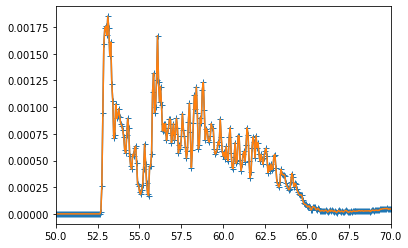

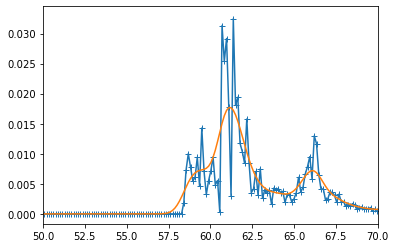

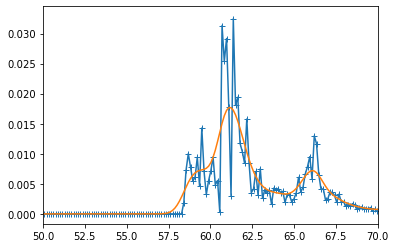

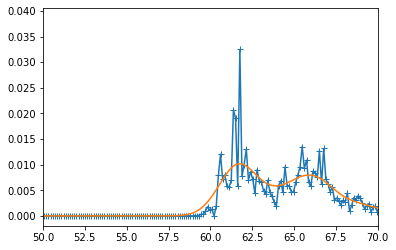

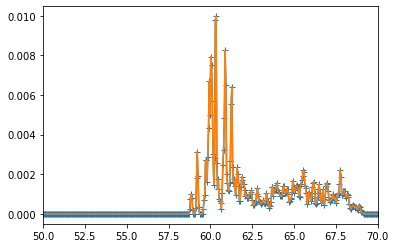

In [82]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt


for compound in compounds: 
    x = df['energy '+compound]
    y = df['XAS '+compound]

# The third parameter specifies the type of the variable x;
# 'c' stands for continuous
    kr = KernelReg(y,x,'c')
    plt.plot(x, y, '+-')
    y_pred, y_std = kr.fit(x)

    plt.plot(x, y_pred)
    plt.xlim(50,70)
    plt.show()

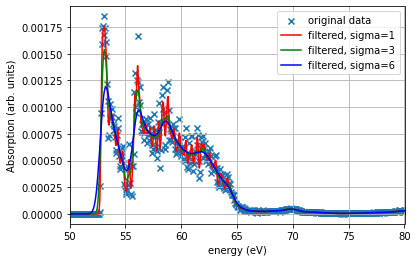

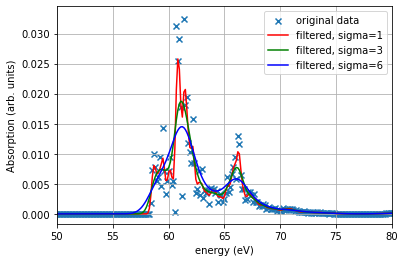

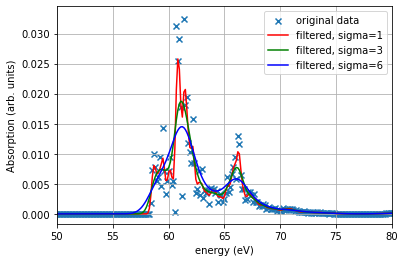

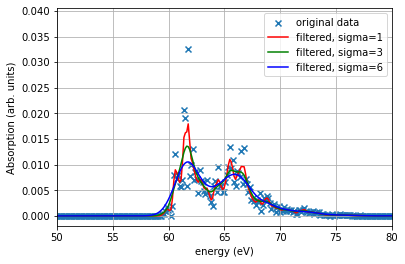

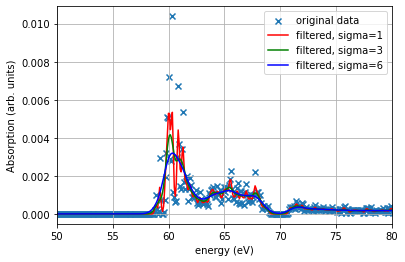

In [134]:
from scipy.ndimage import gaussian_filter1d


for compound in compounds: 
    x = df['energy '+compound]
    y = df['XAS '+compound]
    y1= gaussian_filter1d(y,1) 
    y3= gaussian_filter1d(y,3) 
    y6= gaussian_filter1d(y,6) 
     

    plt.scatter(x,y, marker='x', label='original data')

    plt.plot(x,y1, 'r', label='filtered, sigma=1')
    plt.plot(x,y3, 'g', label='filtered, sigma=3')
    plt.plot(x,y6, 'b', label='filtered, sigma=6')
    plt.xlabel('energy (eV)')
    plt.ylabel('Absorption (arb. units)')

    plt.legend()
    plt.grid()
    plt.xlim(50,80)
    plt.show()
   

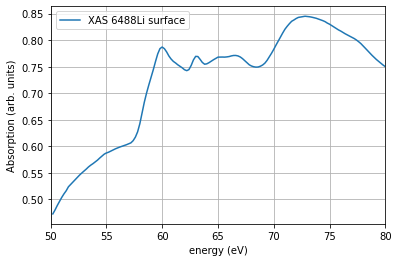

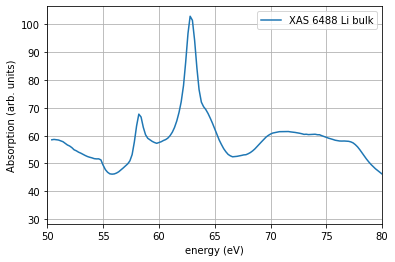

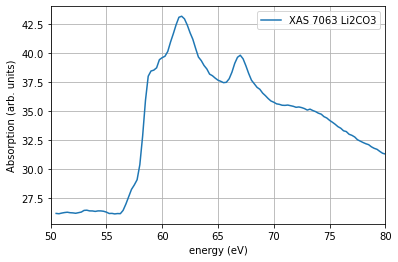

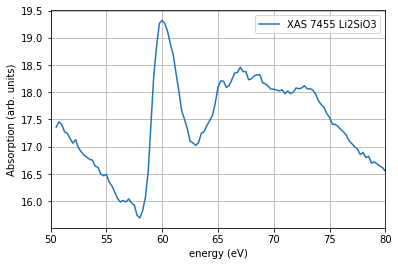

In [135]:
# Experiment
Sheets=['6488Li surface', '6488 Li bulk', '7063 Li2CO3', '7455 Li2SiO3']

df_exp=pd.DataFrame({})

for sheet in Sheets: 
    temp=pd.read_excel(open('/home/broqvist/RUN/XAS/Licompounds.xlsx', 'rb'),sheet_name=sheet,header=1, names=['energy '+sheet,'XAS '+sheet])   
    df_exp=pd.concat([df_exp, temp], axis=1)
    df_exp.plot(x='energy '+sheet,y='XAS '+sheet)
    plt.xlabel('energy (eV)')
    plt.ylabel('Absorption (arb. units)')

    plt.legend()
    plt.grid()
    plt.xlim(50,80)
    plt.show()
   

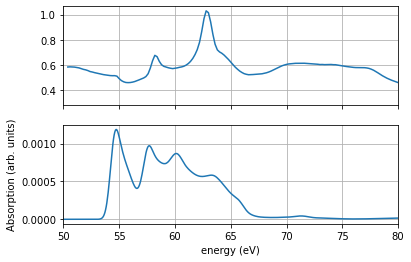

In [201]:
#Li combined 
fig, axs = plt.subplots(2, sharex=True)
#axs[0].plot(df_exp['energy '+Sheets[0]], df_exp['XAS '+Sheets[0]])

axs[0].plot(df_exp['energy '+Sheets[1]], df_exp['XAS '+Sheets[1]]/100)

#axs[1].plot(df['energy '+compounds[0]],df['XAS '+compounds[0]])
axs[1].plot(df['energy '+compounds[0]]+1.5,gaussian_filter1d(df['XAS '+compounds[0]],6) )


plt.xlabel('energy (eV)')
plt.ylabel('Absorption (arb. units)')

axs[0].grid()
axs[0].set_xlim(50,80)
axs[1].grid()
axs[1].set_xlim(50,80)

plt.show()

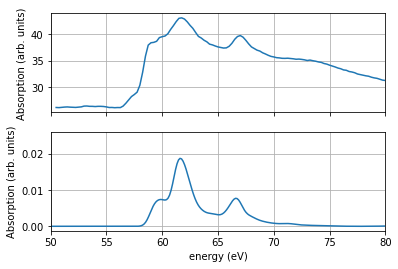

In [182]:
#Li2CO3
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(df_exp['energy '+Sheets[2]], df_exp['XAS '+Sheets[2]])
#axs[1].plot(df['energy '+compounds[0]],df['XAS '+compounds[0]])
axs[1].plot(df['energy '+compounds[1]]+0.5,gaussian_filter1d(df['XAS '+compounds[1]],3) )


axs[1].set_xlabel('energy (eV)')
axs[0].set_ylabel('Absorption (arb. units)')
axs[1].set_ylabel('Absorption (arb. units)')

axs[0].grid()
axs[0].set_xlim(50,80)
#axs[1].legend()
axs[1].grid()
axs[1].set_xlim(50,80)

plt.show()

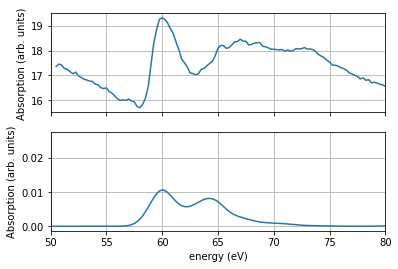

In [183]:
#Li2SiO3
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(df_exp['energy '+Sheets[3]], df_exp['XAS '+Sheets[3]])
#axs[1].plot(df['energy '+compounds[0]],df['XAS '+compounds[0]])
axs[1].plot(df['energy '+compounds[3]]+-1.7,gaussian_filter1d(df['XAS '+compounds[3]],6) )


axs[1].set_xlabel('energy (eV)')
axs[0].set_ylabel('Absorption (arb. units)')
axs[1].set_ylabel('Absorption (arb. units)')

#axs[0].legend()
axs[0].grid()
#axs[0].xlim(50,80)
#axs[1].legend()
axs[1].grid()
axs[1].set_xlim(50,80)

plt.show()

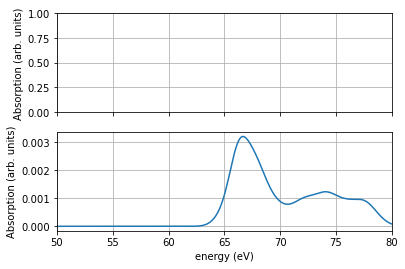

In [198]:
#Li4SiO4
fig, axs = plt.subplots(2, sharex=True)
#axs[0].plot(df_exp['energy '+Sheets[3]], df_exp['XAS '+Sheets[3]])
#axs[1].plot(df['energy '+compounds[0]],df['XAS '+compounds[0]])
axs[1].plot(df['energy '+compounds[3]],gaussian_filter1d(df['XAS '+compounds[4]],6) )


axs[1].set_xlabel('energy (eV)')
axs[0].set_ylabel('Absorption (arb. units)')
axs[1].set_ylabel('Absorption (arb. units)')

#axs[0].legend()
axs[0].grid()
#axs[0].xlim(50,80)
#axs[1].legend()
axs[1].grid()
axs[1].set_xlim(50,80)

plt.show()